In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.math import confusion_matrix

C:\Users\Yelim\anaconda3 a\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
def read_scale_dataset():
    train_data = pd.read_csv("mnist_test.csv", header=None)
    test_data = pd.read_csv("mnist_test.csv", header=None)
    
    # visualizing class label frequency in the input data
    train_data[0].value_counts().plot.bar(color='cyan')
    
    X_train = train_data.drop(0, axis=1).values
    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_train = X_train.astype('float32')
    X_train = X_train/255.0
    
    Y_train = train_data[0].values
    
    X_test = test_data.drop(0, axis=1).values
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    X_test = X_test.astype('float32')
    X_test = X_test/255.0
    
    Y_test = test_data[0].values
    
    return X_train, Y_train, X_test, Y_test


In [15]:
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(28,28,1), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, kernel_initializer='he_uniform', activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [16]:
def evaluate_model(X_train, Y_train, X_test, Y_test):
    # model fitting
    model = create_model()
    history = model.fit(X_train, Y_train, epochs=20, batch_size=32)
    print('\n\n')
    model.summary()
    print('\n\n')
    model.evaluate(X_test, Y_test)
    
    return model, history

In [17]:
def learning_curve(hist):
    print('\n')
    plt.subplot(3, 1, 1)
    plt.title('Classification Accuracy')
    plt.plot(hist.history['accuracy'], color='blue', label='train')
    plt.subplot(3, 1, 3)
    plt.title('Cross Entropy Loss')
    plt.plot(hist.history['loss'], color='red', label='train')
    plt.show()

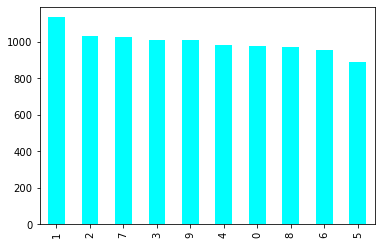

In [18]:
X_train, Y_train, X_test, Y_test = read_scale_dataset()

Class Label 0


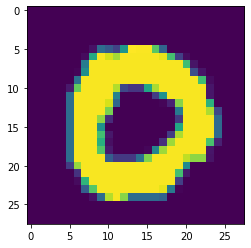

In [19]:
print('Class Label', Y_train[440])
plt.imshow(X_train[440].reshape(28,28))


In [20]:
model, history = evaluate_model(X_train, Y_train, X_test, Y_test)

Epoch 1/20
313/313 [==============================] - 8s 20ms/step - loss: 0.3021 - accuracy: 0.9063
Epoch 2/20
313/313 [==============================] - 6s 21ms/step - loss: 0.0841 - accuracy: 0.9743
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0433 - accuracy: 0.9871
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0181 - accuracy: 0.9956
Epoch 5/20
313/313 [==============================] - 6s 21ms/step - loss: 0.0126 - accuracy: 0.9975
Epoch 6/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0086 - accuracy: 0.9978
Epoch 7/20
313/313 [==============================] - 6s 21ms/step - loss: 0.0034 - accuracy: 0.9997
Epoch 8/20
313/313 [==============================] - 6s 20ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/20
313/313 [==============================] - 6s 20ms/step - loss: 6.2286e-04 - accuracy: 1.0000
Epoch 10/20
313/313 [==============================] - 6s 20ms/step - loss: 4.7114e-04 

In [21]:
Y_pred = model.predict(X_test)


313/313 [==============================] - 3s 8ms/step


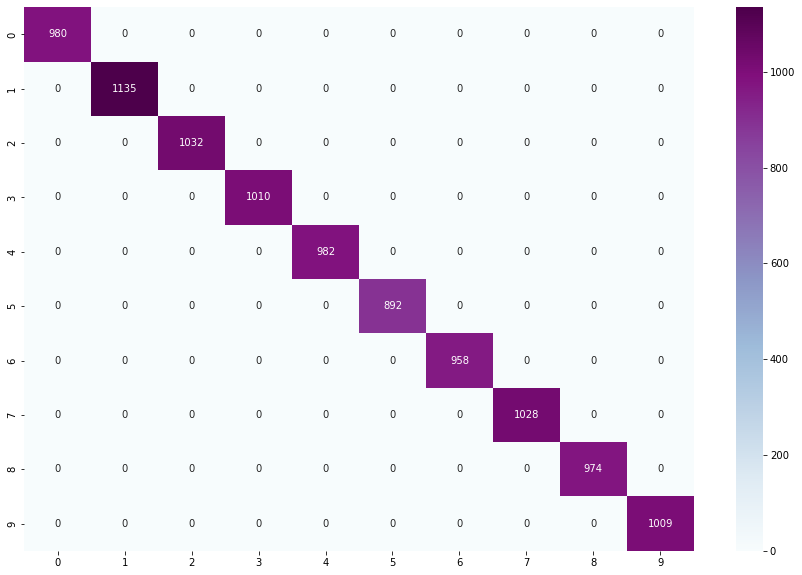

In [22]:
# confusion matrix
cf = confusion_matrix(labels=Y_test, predictions=[np.argmax(i) for i in Y_pred])
plt.figure(figsize=(15,10))
sns.heatmap(cf, annot=True, fmt='d', cmap='BuPu');
print('\n\n')



Actual label:  8
Predicted label:  9
The corresponding Image: 




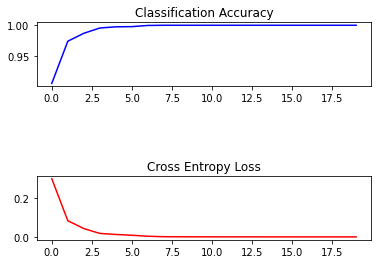

In [24]:
# manually checking authenticity of model in terms of predictions
print("\nActual label: ", Y_test[781])
print("Predicted label: ", np.argmax(Y_pred[78]))
print("The corresponding Image: ")
plt.imshow(X_test[781].reshape(28,28))
learning_curve(history)